In [1]:
### Instalacja biblioteki scikit-learn
# wchodzę do terminal -> wybieram command prompt -> wpisuje: pip install scikit-learn


In [1]:
import pandas as pd
import seaborn as sns

In [3]:
# teraz importujemy dane, które za pomocą Pandas sobie pobierzemy
df_delivery = pd.read_csv('../../Pliki/05_scikit_learn/delivery.csv')
df_delivery.head()

,Distance,CarrierType,Weekend,HolidaysNearby,WeatherCondition,PackageWeight,DeliveredOnTime
0,132.34,Express,Yes,No,Snowy,15.10,No
1,291.95,Overnight,No,Yes,Stormy,5.55,Yes
2,77.43,Standard,Yes,Yes,Rainy,11.59,No
3,97.52,Overnight,Yes,No,Snowy,9.63,Yes
4,451.64,Overnight,Yes,No,Clear,24.76,Yes


### I. Analiza Danych

In [6]:
# Jako pierwszy punkt, to tzerba zrozumieć biznes. Robimy to za pomocą funkcji 'info' + 'describe' + describe(include='object')
# teraz robimy analize
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance          1000 non-null   float64
 1   CarrierType       1000 non-null   object 
 2   Weekend           1000 non-null   object 
 3   HolidaysNearby    1000 non-null   object 
 4   WeatherCondition  1000 non-null   object 
 5   PackageWeight     1000 non-null   float64
 6   DeliveredOnTime   1000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [5]:
#sprawdzamy podstawowe staytyseki
df_delivery.describe()

,Distance,PackageWeight
count,1000.000000,1000.000000
mean,246.916310,12.565810
std,143.452532,7.110071
min,1.270000,0.500000
25%,121.972500,6.455000
50%,251.650000,12.455000
75%,366.670000,18.595000
max,498.530000,24.940000


In [7]:
df_delivery.describe(include='object') # to nam poakzauje jakie są opcje dla róznych kwestii, np. mamy 4 rodzaje pogody, 3 rodzazje 'CarrierType' itd. Żeby móc stwierdzić, jakimi metodami trzeba trenowac model

,CarrierType,Weekend,HolidaysNearby,WeatherCondition,DeliveredOnTime
count,1000,1000,1000,1000,1000
unique,3,2,2,4,2
top,Overnight,No,Yes,Rainy,Yes
freq,349,513,528,260,532


C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_

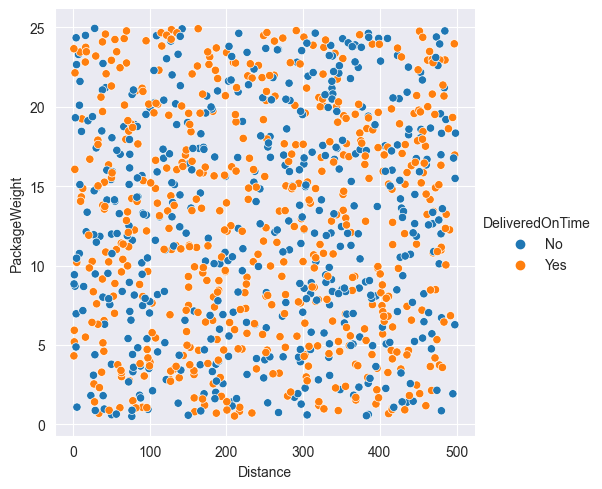

In [9]:
#jeszcze sprawdzimy relacje pomiedzy np. dystansem, a wagą paczki, czy są skorelowane, bo gdy wykorzystujemy dane, które są skorelwone nie powinny byc skorelowane - bo to stanowi problem
_ = sns.relplot(df_delivery, x='Distance', y='PackageWeight', hue='DeliveredOnTime')

C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\seaborn\_

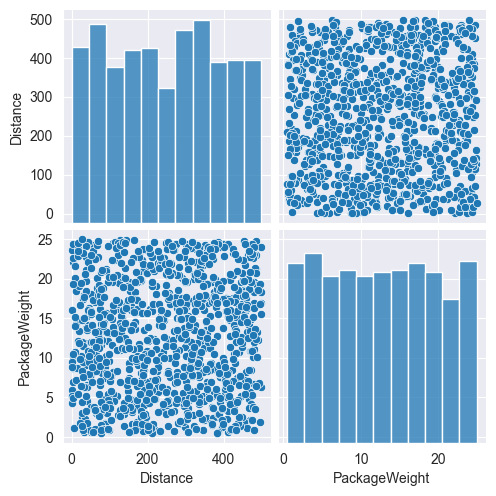

In [10]:
_ = sns.pairplot(df_delivery)

In [11]:
# i jak widać na powyższych wykresach, nie ma zadnych korelacji danych - dane/wartości są rozproszone

In [13]:
#Machine Laring nie ropzumie wartości opisowych, powinien miec numeryczne/bool, takze kategorie
pd.get_dummies(df_delivery, dtype='float')
# i jak widać, dane opisowe zostały zmienione na 1 lub 0, czyli tak albo nie

,Distance,PackageWeight,CarrierType_Express,CarrierType_Overnight,CarrierType_Standard,Weekend_No,Weekend_Yes,HolidaysNearby_No,HolidaysNearby_Yes,WeatherCondition_Clear,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy,DeliveredOnTime_No,DeliveredOnTime_Yes
0,132.34,15.10,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,291.95,5.55,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,77.43,11.59,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,97.52,9.63,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,451.64,24.76,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,238.70,14.03,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,17.53,23.47,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,24.87,6.42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,305.25,2.74,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [14]:
df_delivery = pd.get_dummies(df_delivery, dtype='float', drop_first=True)

In [15]:
df_delivery.head()

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend_Yes,HolidaysNearby_Yes,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy,DeliveredOnTime_Yes
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
df_delivery = df_delivery.rename({'Weekend_Yes':'Weekend', 'HolidaysNearby_Yes':'HolidaysNearby', 'DeliveredOnTime_Yes':'DeliveredOnTime'}, axis=1)

In [20]:
df_delivery.head()

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend,HolidaysNearby,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy,DeliveredOnTime
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


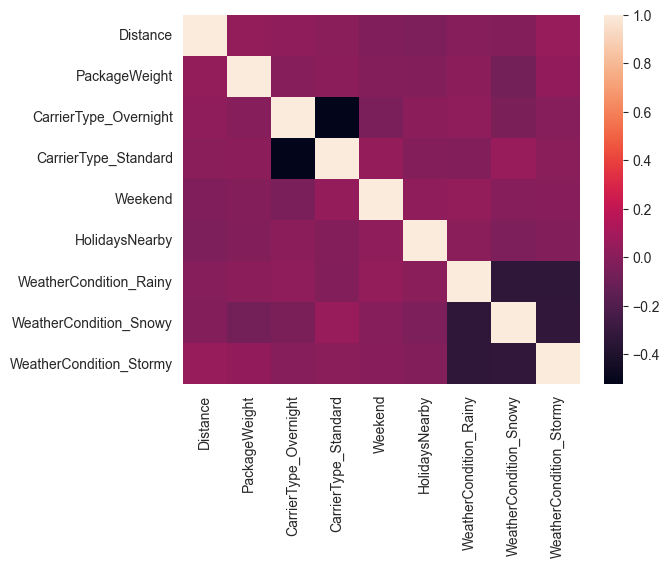

In [21]:
#znów sprawdzamy korelacje - za pomocą Pandas wyliczymy metrykę corelation - tzw. heatmap
_ = sns.heatmap(df_delivery.drop('DeliveredOnTime', axis=1).corr())

In [22]:
df_delivery2 = pd.read_csv('../../Pliki/05_scikit_learn/delivery.csv')# jeszx=cze raz zacigamy dane, za pomoca Pandas
df_delivery2.head() # wyswietlam 'df_delivery2', ale z racji że jest head to tylko piec górnych wartości

,Distance,CarrierType,Weekend,HolidaysNearby,WeatherCondition,PackageWeight,DeliveredOnTime
0,132.34,Express,Yes,No,Snowy,15.10,No
1,291.95,Overnight,No,Yes,Stormy,5.55,Yes
2,77.43,Standard,Yes,Yes,Rainy,11.59,No
3,97.52,Overnight,Yes,No,Snowy,9.63,Yes
4,451.64,Overnight,Yes,No,Clear,24.76,Yes


In [23]:
df_delivery2 = pd.get_dummies(df_delivery2, dtype='float')

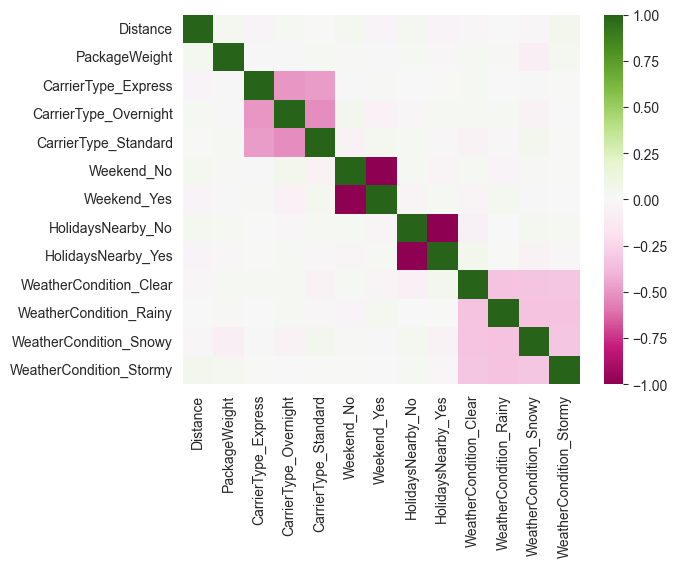

In [24]:
_ = sns.heatmap(df_delivery2.drop(['DeliveredOnTime_Yes', 'DeliveredOnTime_No'], axis=1).corr(), cmap='PiYG')

### II. TERAZ DZIELIMY DANE NA CECHY I ETYKIETY

In [33]:
df_delivery

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend,HolidaysNearby,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,238.70,14.03,0.0,1.0,1.0,0.0,0.0,1.0,0.0
996,17.53,23.47,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,24.87,6.42,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,305.25,2.74,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [32]:
data = df_delivery # nowa zmienna 'data'
target = data.pop('DeliveredOnTime') # nowa zmienna 'target'

KeyError: 'DeliveredOnTime'

In [31]:
data

,Distance,PackageWeight,CarrierType_Overnight,CarrierType_Standard,Weekend,HolidaysNearby,WeatherCondition_Rainy,WeatherCondition_Snowy,WeatherCondition_Stormy
0,132.34,15.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,291.95,5.55,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,77.43,11.59,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,97.52,9.63,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,451.64,24.76,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,238.70,14.03,0.0,1.0,1.0,0.0,0.0,1.0,0.0
996,17.53,23.47,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997,24.87,6.42,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,305.25,2.74,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [34]:
target

0      0.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
995    0.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: DeliveredOnTime, Length: 1000, dtype: float64

### Teraz podział na zbiory treningowe + testowe

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=5) #i po kolei mamy: zbior treningowy cech(X_train), zbior testowy cech, zbior treningowy etykiet, zbior testowy etykiet


In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 9)
(250, 9)
(750,)
(250,)


In [ ]:
# (750 trafiło do X_train)
# itd..

## Uczenie

#### Trening modelu



In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_regression = LogisticRegression() #zmienna któa przechowuje ten model
log_regression.fit(X_train, y_train)#teraz chcemy trenowac


C:\Users\wiltos\PycharmProjects\AnalizaDanych _BI_Zjazd-09-10.IX\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = log_regression.predict(X_test) # teraz robimy predykcję
y_pred # wyswietlam 'y_pred'

array([1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0.

### Ocena - macierz pomyłek - teraz korzystamy z macierzy pomyłek i liczymy statystyki

In [41]:
from sklearn.metrics import confusion_matrix

In [44]:
cm = confusion_matrix(y_test, y_pred)  # zmienna cm
cm # wyswietlam 'cm'

array([[115,   0],
       [  5, 130]], dtype=int64)

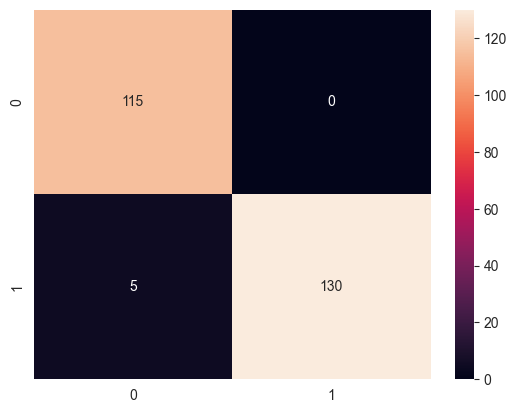

In [45]:
# teraz generujemy heatmap
_ = sns.heatmap(cm, annot=True, fmt='d')

### OCENA DOKŁADNOSCI

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc # wyswietlam 'acc'

0.98

### OCENA - pełny raport

In [47]:
from sklearn.metrics import classification_report

In [48]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       115
         1.0       1.00      0.96      0.98       135

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [ ]:
# precision=prceyzja trafien, recall=czułość, f1-score=srednia harmoniczna